#  AI HW6-1

**Name**: sara Rajabzadeh

**Student ID**:

**Sources**:

## Q1 Perceptron (40pts)

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

<img src ="./image/percep.png" >

Like most other techniques for training linear classifiers, the perceptron generalizes naturally to multiclass. Each training instance is a feature vector $\normalsize x$ and a class label $\normalsize y^*$. Each class has a weight vector $\normalsize w_{y}$. The feature vector is multiplied by the weight vectors and score of class $\normalsize y$ will be $\normalsize x.w_{y}$. The resulting scores is used to choose the predicted class:
\begin{equation}
\normalsize
\hat{y} = \underset{y}{\operatorname{argmax}} x.w_{y}
\end{equation}

For learning, perceptron starts with all weights equal to zero and iterates over the examples one by one, predicting an output for each. It leaves the weights unchanged when the predicted output matches the target. If the prediction is wrong, it lowers the score of wrong answer and raise the score of right answer. Therefore, the updates become:
\begin{equation}
\normalsize
w_{\hat{y}} = w_{\hat{y}} - x \\
\normalsize
w_{y^*} = w_{y^*} + x
\end{equation}
where $\hat{y}$ is the predicted wrong class and $y^*$ is the right class.

Open `perceptron.py` and complete the code of the perceptron model in it.

In [202]:
from perceptron import Perceptron
import os
from matplotlib import pyplot as plt

model = Perceptron(784, 10)

In [203]:
def load_data(root_path):
    train_data_file_names = ['train{}.npy'.format(x) for x in range(1, 6)]
    test_data_file_name = 'test.npy'
    test_labels_file_name = 'labels_test.npy'
    train_labels_file_name = 'labels_train.npy'
    
    train_data_list = []
    for file_name in train_data_file_names:
        file_path = os.path.join(root_path, file_name)
        train_data_list.append(np.load(file_path))
        
    test_data = np.load(os.path.join(root_path, test_data_file_name))
    test_labels = np.load(os.path.join(root_path, test_labels_file_name))
    train_labels = np.load(os.path.join(root_path, train_labels_file_name))
    
    return test_data, train_data_list, test_labels, train_labels


In [243]:
np.random.seed(42)

test_data, train_data_list, test_labels, train_labels = load_data('data')

################################TODO: 2 points ########################################
train_data = np.concatenate((train_data_list[0],train_data_list[1],train_data_list[2],train_data_list[3],train_data_list[4]))
#################################################################################

print(train_data.shape)  # Expected ouput: (60000, 784)
print(test_data.shape)  # Expected ouput: (10000, 784)
print(test_labels.shape)  # Expected ouput: (10000,)
print(train_labels.shape)  # Expected ouput: (60000,)


X_test, y_test = test_data, test_labels

#################################TODO: 5 points ######################################
X_train, X_val = train_data[1000:],train_data[:1000] 
y_train, y_val = train_labels[1000:] , train_labels[:1000]
#################################################################################

print(X_train.shape, X_val.shape)  # Expected ouput: (59000, 784) (1000, 784)
print(y_train.shape, y_val.shape)  # Expected ouput: (59000,) (1000,)

(60000, 784)
(10000, 784)
(10000,)
(60000,)
(59000, 784) (1000, 784)
(59000,) (1000,)


In [244]:
# adding 1s to the end of feature vectors to be multiplied by bias term of weights
# WARNING: RUN THIS CELL ONLY ONCE!
X_val = np.insert(X_val, 0, 1, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)  # Expected ouput: (59000, 785)
print(X_val.shape)  # Expected ouput: (1000, 785)
print(X_test.shape)  # Expected ouput: (10000, 785)

(59000, 785)
(1000, 785)
(10000, 785)


Now let's train your model on the training set. Meanwhile, the accuracy on the validation set is printed out to make sure that the model is training well. Your model has to reach an accuracy higher than 85% on the validation set (5 points). We have provided this code for you.

In [ ]:
val_accs = []
for i, (x, y) in enumerate(zip(X_train, y_train)):
    model.train(x, y)
    if i % 1000 == 0:
        val_res =  [model.predict(x_val) == y_val for x_val, y_val in zip(X_val, y_val)]
        val_acc = np.sum(val_res) / len(val_res)
        val_accs.append(val_acc*100)  # recording the accuray to be plotted after training 
        print("iteration number %d, accuracy on validation set: %.2f%%" % (i, 100*val_acc))

Let's plot the accuracy on validation set:

In [ ]:
plt.plot(val_accs)
plt.ylabel('validation accuracy')
plt.xlabel('iteration number')
plt.show()

Finally let's test your model on the test set. You have to get an accuracy above 85% (5 points).

In [ ]:
test_res =  [model.predict(x_test) == y_test for x_test, y_test in zip(X_test, y_test)]
test_acc = np.sum(test_res) / len(test_res)
print("accuracy on test set: %.2f%%" % (100*test_acc))

## Q2 Linear Regression (40pts)

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 

We're going to predict the price of houses using the dataset provided by multiple linear regression.

In [275]:
#####################################TODO: 5 points############################################
## Read the train data
import pandas as pd
housing = pd.read_csv("data/Regression_train.csv")
#################################################################################

In [276]:
housing = pd.DataFrame(housing)
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [277]:
label = housing["SalePrice"]
label

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [278]:
for i in housing:
    housing[i] =housing[i].astype('category').cat.codes


In [279]:
housing =  housing.iloc[:,1:]
housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,36,327,1,-1,3,3,0,4,...,0,-1,-1,-1,0,1,2,8,4,412
1,0,3,51,498,1,-1,3,3,0,2,...,0,-1,-1,-1,0,4,1,8,4,339
2,5,3,39,702,1,-1,0,3,0,4,...,0,-1,-1,-1,0,8,2,8,4,442
3,6,3,31,489,1,-1,0,3,0,0,...,0,-1,-1,-1,0,1,0,8,0,194
4,5,3,55,925,1,-1,0,3,0,2,...,0,-1,-1,-1,0,11,2,8,4,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,-1,3,3,0,4,...,0,-1,-1,-1,0,7,1,8,4,314
1456,0,3,56,866,1,-1,3,3,0,4,...,0,-1,2,-1,0,1,4,8,4,415
1457,6,3,37,415,1,-1,3,3,0,4,...,0,-1,0,2,17,4,4,8,4,527
1458,0,3,39,505,1,-1,3,3,0,4,...,0,-1,-1,-1,0,3,4,8,4,199


In [280]:
#####################################TODO: 10 points############################################
## Plot the correlation matrix between different numerical features,
####and then select top 10 numerical features using correlation test.

import seaborn as sns; sns.set_theme()
corr_matrix = housing.corr()
corr_matrix
#################################################################################

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.037785,-0.252797,-0.298528,-0.025737,0.150026,0.090920,-0.007658,-0.026217,0.060625,...,0.017759,0.023320,-0.101369,-0.043920,-0.012910,0.007052,-0.022100,0.020195,-0.033097,-0.040552
MSZoning,0.037785,1.000000,-0.074814,-0.080135,0.087654,-0.191736,0.061887,-0.017854,-0.001192,-0.009895,...,-0.002825,-0.002945,0.066785,-0.004913,0.018630,-0.031496,-0.020628,0.097437,0.009494,-0.231544
LotFrontage,-0.252797,-0.074814,1.000000,0.344616,-0.034213,-0.107586,0.101498,-0.041749,-0.036541,-0.020528,...,0.043943,0.066413,0.014768,-0.017834,-0.037056,0.020119,-0.008113,-0.047100,0.061798,0.242167
LotArea,-0.298528,-0.080135,0.344616,1.000000,-0.058066,-0.154486,-0.308136,-0.038541,0.038049,-0.199341,...,0.068781,0.079850,-0.063297,0.054501,0.062162,-0.002017,-0.031183,-0.021014,0.062024,0.465584
Street,-0.025737,0.087654,-0.034213,-0.058066,1.000000,0.015611,-0.010224,0.115995,0.001682,0.013960,...,0.003986,0.004154,0.029166,-0.161099,-0.097106,0.003690,-0.025043,0.014339,0.006064,0.043856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.007052,-0.031496,0.020119,-0.002017,0.003690,-0.021453,-0.033455,-0.011599,-0.051552,0.018902,...,-0.019690,-0.033227,-0.004815,0.013902,0.015624,1.000000,-0.145721,-0.047386,0.013320,0.066897
YrSold,-0.022100,-0.020628,-0.008113,-0.031183,-0.025043,-0.012036,0.036449,0.020507,0.023353,-0.005992,...,-0.058157,-0.046232,0.039943,0.056609,0.044934,-0.145721,1.000000,-0.002327,0.003880,-0.030615
SaleType,0.020195,0.097437,-0.047100,-0.021014,0.014339,-0.007971,-0.000911,-0.025754,-0.126770,0.014325,...,0.016619,0.003626,0.001770,-0.001227,0.013664,-0.047386,-0.002327,1.000000,0.184067,-0.034873
SaleCondition,-0.033097,0.009494,0.061798,0.062024,0.006064,-0.037998,-0.038118,0.033809,-0.089701,0.051579,...,-0.061572,-0.029612,-0.107387,-0.006699,0.016420,0.013320,0.003880,0.184067,1.000000,0.236321


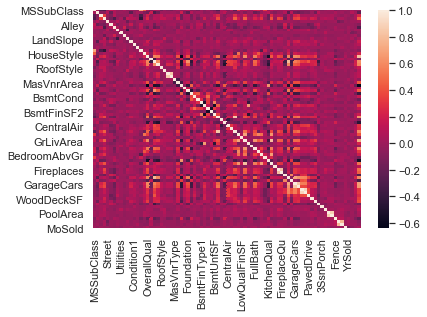

In [281]:
sns.heatmap(corr_matrix)

In [282]:

housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,36,327,1,-1,3,3,0,4,...,0,-1,-1,-1,0,1,2,8,4,412
1,0,3,51,498,1,-1,3,3,0,2,...,0,-1,-1,-1,0,4,1,8,4,339
2,5,3,39,702,1,-1,0,3,0,4,...,0,-1,-1,-1,0,8,2,8,4,442
3,6,3,31,489,1,-1,0,3,0,0,...,0,-1,-1,-1,0,1,0,8,0,194
4,5,3,55,925,1,-1,0,3,0,2,...,0,-1,-1,-1,0,11,2,8,4,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,-1,3,3,0,4,...,0,-1,-1,-1,0,7,1,8,4,314
1456,0,3,56,866,1,-1,3,3,0,4,...,0,-1,2,-1,0,1,4,8,4,415
1457,6,3,37,415,1,-1,3,3,0,4,...,0,-1,0,2,17,4,4,8,4,527
1458,0,3,39,505,1,-1,3,3,0,4,...,0,-1,-1,-1,0,3,4,8,4,199


In [283]:
import numpy as np
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.08:
            if columns[j]:
                columns[j] = False
# print(columns)
# print(housing.columns)

selected_columns = corr_matrix.columns[columns]
print(selected_columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'Utilities', 'Condition2',
       'MasVnrType', 'Heating', 'LowQualFinSF', '3SsnPorch', 'MoSold',
       'YrSold'],
      dtype='object')


In [284]:
#####################################TODO: 10 points############################################
## Fit a multiple linear regression model to the data and report the results.
housing = housing[selected_columns]
housing["price"] = label
housing

#################################################################################

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,MSSubClass,MSZoning,LotFrontage,Utilities,Condition2,MasVnrType,Heating,LowQualFinSF,3SsnPorch,MoSold,YrSold,price
0,5,3,36,0,2,1,1,0,0,1,2,208500
1,0,3,51,0,2,2,1,0,0,4,1,181500
2,5,3,39,0,2,1,1,0,0,8,2,223500
3,6,3,31,0,2,2,1,0,0,1,0,140000
4,5,3,55,0,2,1,1,0,0,11,2,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,0,2,2,1,0,0,7,1,175000
1456,0,3,56,0,2,3,1,0,0,1,4,210000
1457,6,3,37,0,2,2,1,0,0,4,4,266500
1458,0,3,39,0,2,2,1,0,0,3,4,142125


In [285]:
label = housing.iloc[:,-1:]
label

,price
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [286]:
housing = housing.iloc[:,:-1]
housing

,MSSubClass,MSZoning,LotFrontage,Utilities,Condition2,MasVnrType,Heating,LowQualFinSF,3SsnPorch,MoSold,YrSold
0,5,3,36,0,2,1,1,0,0,1,2
1,0,3,51,0,2,2,1,0,0,4,1
2,5,3,39,0,2,1,1,0,0,8,2
3,6,3,31,0,2,2,1,0,0,1,0
4,5,3,55,0,2,1,1,0,0,11,2
...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,0,2,2,1,0,0,7,1
1456,0,3,56,0,2,3,1,0,0,1,4
1457,6,3,37,0,2,2,1,0,0,4,4
1458,0,3,39,0,2,2,1,0,0,3,4


In [287]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
reg =lin_reg.fit(housing , label)


In [288]:
#####################################TODO: 15 points############################################
## Plot the real price vs predicted price for each house.
# Evaluate your model by different measures such as R-Squared.
d = reg.predict(housing)
d
#################################################################################

array([[181636.7774533 ],
       [195400.28548801],
       [190340.31567115],
       ...,
       [181872.0897317 ],
       [179627.92824294],
       [190423.0280901 ]])

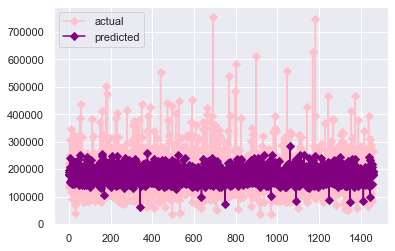

In [289]:
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(label),marker='D',color='pink',label = "actual")  
plt.plot(pd.DataFrame(d),marker='D', color='purple', label = "predicted") 
plt.legend()

In [290]:
from sklearn.metrics import r2_score
r = r2_score(label,d)

In [291]:
r

0.11021018973991037